In [1]:
from utils.Linear_GAN_utils import *
import torch
import numpy as np
import pandas as pd
# from numpy import cov
# from numpy import trace
# from numpy import iscomplexobj
# from scipy.linalg import sqrtm
from scipy.stats import f
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

2022-12-19 09:58:13.939532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 09:58:13.939577: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [3]:
def show_images(data, n_samples):

    plt.figure(figsize=(8,2))

    for i in range(n_samples):
        image = data[i][0].reshape(8, 8)
        plt.subplot(1,n_samples,i+1)
        plt.axis('off')
        plt.imshow(image.numpy(), cmap='gray')
        
    plt.show()

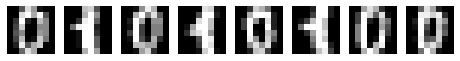

In [4]:
digits = datasets.load_digits()

x_train = digits.data
y_train = digits.target

x_train = x_train.reshape(len(x_train), 8, 8)
x_train.shape

rd, real_data = resize_data(x_train, y_train, label = (0, 1), image_size = 8)
show_images(rd, 8)

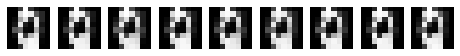

(None, torch.Size([1, 8, 8]))

In [14]:
#model = torch.load('torch_results/GAN/GAN_linear/20221216-184000/gen_epoch_500')   # '0' features
model = torch.load('torch_results/GAN/GAN_linear/20221219-092917/gen_epoch_1500') # '0','1' features
#model = torch.load('torch_results/GAN/GAN_linear/20221219-100153/gen_epoch_2000')  # '0','1','2' features
model.eval()

GAN_imgs = []
for i in range(len(real_data)):      
    fixed_noise = torch.rand(1, 5)  
    image = model(fixed_noise).view(1,8,8).cpu().detach()
    GAN_imgs.append(image)

show_images(GAN_imgs, 9), GAN_imgs[0].shape

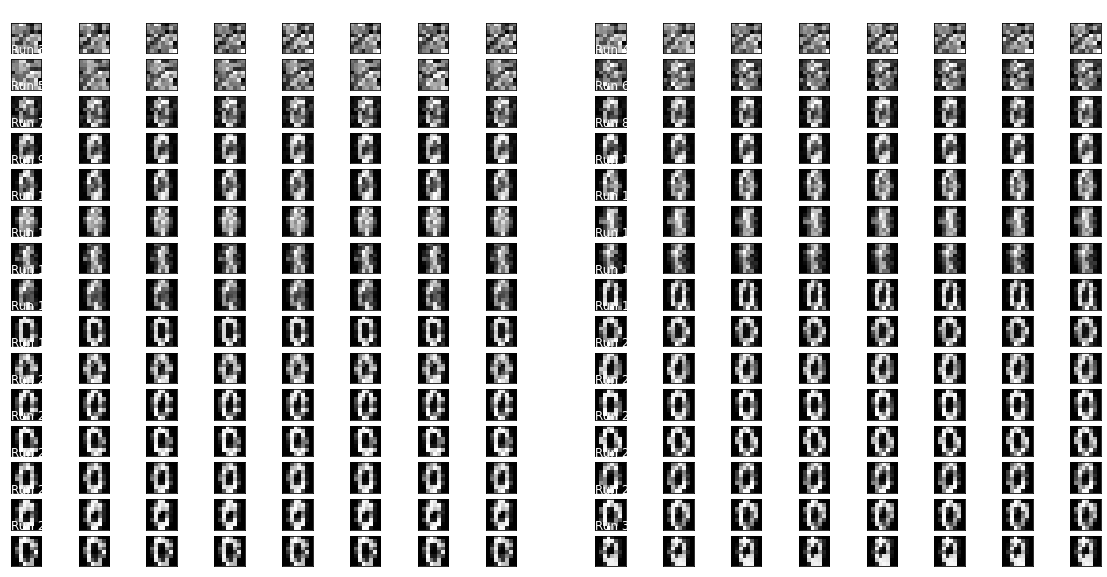

In [15]:
synthetic = torch.load('torch_results/GAN/GAN_linear/20221219-100153/synthetic.pt')
generated_images(synthetic)

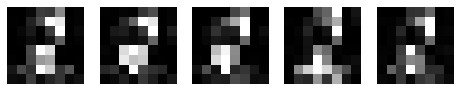

(None, torch.Size([1, 8, 8]))

In [ ]:
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-184033/q_gen_epoch_500')  # '0' features 6 layers
q_model = torch.load('torch_results/QGAN/QGAN_linear/20221219-093229/q_gen_epoch_1500')  # '0','1' features 6 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-125209/q_gen_epoch_1000')  # '0','1' features 8 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-150017/q_gen_epoch_2000')  # '0','1' features 10 layers
#q_model = torch.load('torch_results/QGAN/QGAN_linear/20221216-112234/q_gen_epoch_2000')  # '0','1','2' features
q_model.eval()

QGAN_imgs = []
for i in range(len(real_data)):      
    fixed_noise = torch.rand(1, 5)  
    q_image = q_model(fixed_noise).view(1,8,8).cpu().detach()
    QGAN_imgs.append(q_image)

show_images(QGAN_imgs, 5), QGAN_imgs[0].shape

30


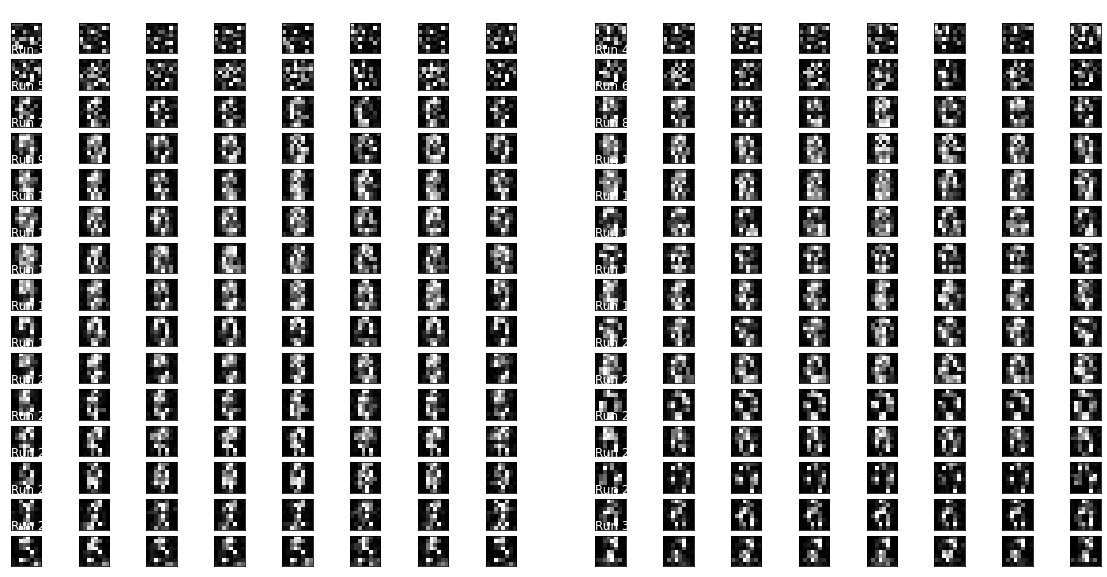

In [11]:
q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221219-093229/synthetic.pt')  # '0','1' features
#q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221216-112234/synthetic.pt')   # '0','1', '2' features
print(len(q_synthetic))
generated_images(q_synthetic)

/tmp/ipykernel_5943/1457776867.py:15: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df1, df2, df3], 1)


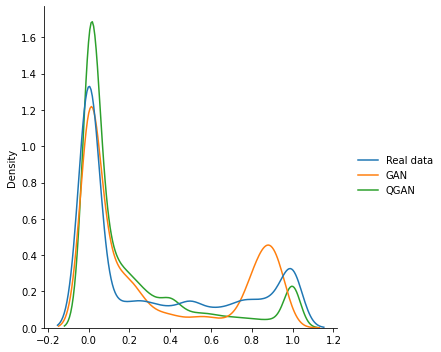

In [12]:
#synthetic = torch.load('torch_results/GAN/GAN_linear/20221215-162449/synthetic.pt')
#q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221215-163837/synthetic.pt')

linear_gan_synthetic = np.concatenate(GAN_imgs).reshape(360, 8, 8)
reshaped_linear_gan_synthetic = linear_gan_synthetic.reshape(360*64)
linear_qgan_synthetic = np.concatenate(QGAN_imgs).reshape(360, 8, 8)
reshaped_linear_qgan_synthetic = linear_qgan_synthetic.reshape(360*64)
real_data = np.concatenate(real_data).reshape(360, 8, 8)
reshaped_real_data = real_data.reshape(360*64)

empty_dataframe = pd.DataFrame(columns=['Real data','GAN', 'QGAN'])
df1 = pd.DataFrame(reshaped_real_data)
df2 = pd.DataFrame(reshaped_linear_gan_synthetic)
df3 = pd.DataFrame(reshaped_linear_qgan_synthetic)
df = pd.concat([df1, df2, df3], 1)
df.columns = ['Real data','GAN', 'QGAN']

sns.displot(data = df, kind = 'kde')

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(real_data.reshape(360*64), f.pdf(real_data.reshape(360*64), 28, 50), 'r-', lw=5, alpha=1, label='f pdf')

# FID score

In [ ]:
def eval_statistic(list):

    mean_tot, std_tot, elem_tot = [], [], []

    for i in range(len(list[0])):
        elem = []
        for row in list:
            elem.append(row[i])  
        elem_tot.append(np.array(elem))
        mean_tot.append(np.mean(elem))
        std_tot.append(np.std(elem))

    return mean_tot, std_tot, elem_tot  

## Linear GAN

### '0' labels

In [ ]:
real = torch.load('torch_results/GAN/GAN_linear/20221213-105111/real.pt')
synthetic = torch.load('torch_results/GAN/GAN_linear/20221213-105111/synthetic.pt')
fid_tot = torch.load('torch_results/GAN/GAN_linear/20221213-105111/fid.pt')
loss_g = torch.load('torch_results/GAN/GAN_linear/20221213-105111/gen_loss.pt')
loss_d = torch.load('torch_results/GAN/GAN_linear/20221213-105111/disc_loss.pt')

mean_tot, _, elem_tot = eval_statistic(fid_tot)

In [ ]:
q_synthetic = torch.load('torch_results/QGAN/QGAN_linear/20221213-110123/synthetic.pt')
q_fid_tot = torch.load('torch_results/QGAN/QGAN_linear/20221213-110123/fid.pt')
q_loss_g = torch.load('torch_results/QGAN/QGAN_linear/20221213-110123/gen_loss.pt')
q_loss_d = torch.load('torch_results/QGAN/QGAN_linear/20221213-110123/disc_loss.pt')

_, _, q_elem_tot = eval_statistic(q_fid_tot)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')
boxes = ax.boxplot(elem_tot, patch_artist=True, showmeans = False, showfliers=False, widths = 0.42, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in boxes["boxes"]:
    box.set(facecolor = "green")

q_boxes = ax.boxplot(q_elem_tot, patch_artist=True, showmeans = False, showfliers=False, widths = 0.32, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in q_boxes["boxes"]:
    box.set(facecolor = "darkkhaki")

fig.text(0.92, 0.63, f'GAN linear\nGen: 6464 params\nDisc: 5127 params', backgroundcolor='green', color='black', weight='roman')
#fig.text(0.92, 0.63, f'GAN linear\nGen: 128 params\nDisc: 5127 params', backgroundcolor='palegreen', color='black', weight='roman')
fig.text(0.92, 0.52, f'QGAN linear\nGen: 120 params\nDisc: 5127 params', backgroundcolor='darkkhaki', color='black', weight='roman')
#fig.text(0.92, 0.52, f'QGAN linear\nGen: 120 params\nDisc: 5127 params', backgroundcolor='palegoldenrod', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('FID score', fontsize=16)
plt.grid()
plt.show()

### '0' and '1' labels

In [ ]:
real1 = torch.load('torch_results/GAN/GAN_linear/20221212-142955/real.pt')
synthetic1 = torch.load('torch_results/GAN/GAN_linear/20221212-142955/synthetic.pt')
fid_mean1 = torch.load('torch_results/GAN/GAN_linear/20221212-142955/fid.pt')
loss_g1 = torch.load('torch_results/GAN/GAN_linear/20221212-142955/gen_loss.pt')
loss_d1 = torch.load('torch_results/GAN/GAN_linear/20221212-142955/disc_loss.pt')

_, _, elem_tot1 = eval_statistic(fid_mean1)

In [ ]:
#generated_images(synthetic1)

In [ ]:
q_synthetic1 = torch.load('torch_results/QGAN/QGAN_linear/20221212-143427/synthetic.pt')
q_fid_mean1 = torch.load('torch_results/QGAN/QGAN_linear/20221212-143427/fid.pt')
q_loss_g1 = torch.load('torch_results/QGAN/QGAN_linear/20221212-143427/gen_loss.pt')
q_loss_d1 = torch.load('torch_results/QGAN/QGAN_linear/20221212-143427/disc_loss.pt')

_, _, q_elem_tot1 = eval_statistic(q_fid_mean1)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')

boxes = ax.boxplot(elem_tot1, patch_artist=True, showmeans = False, showfliers=False, widths = 0.42, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in boxes["boxes"]:
    box.set(facecolor = "palegreen")

q_boxes = ax.boxplot(q_elem_tot1, patch_artist=True, showmeans = False, showfliers=False, widths = 0.32, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in q_boxes["boxes"]:
    box.set(facecolor = "palegoldenrod")    

#fig.text(0.92, 0.63, f'GAN linear\nGen: 6464 params\nDisc: 5127 params', backgroundcolor='green', color='black', weight='roman')
fig.text(0.92, 0.63, f'GAN linear\nGen: 128 params\nDisc: 5127 params', backgroundcolor='palegreen', color='black', weight='roman')
fig.text(0.92, 0.52, f'QGAN linear\nGen: 120 params\nDisc: 5127 params', backgroundcolor='palegoldenrod', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('FID score', fontsize=16)
plt.grid()
plt.show()

In [ ]:
def boxplot(array1, array2):

    fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')

    boxes = ax.boxplot(elem_tot1, patch_artist=True, showmeans = False, showfliers=False, widths = 0.42, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
    for box in boxes["boxes"]:
        box.set(facecolor = "palegreen")

    q_boxes = ax.boxplot(q_elem_tot1, patch_artist=True, showmeans = False, showfliers=False, widths = 0.32, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
    for box in q_boxes["boxes"]:
        box.set(facecolor = "palegoldenrod")    

    #fig.text(0.92, 0.63, f'GAN linear\nGen: 6464 params\nDisc: 5127 params', backgroundcolor='green', color='black', weight='roman')
    fig.text(0.92, 0.63, f'GAN linear\nGen: 128 params\nDisc: 5127 params', backgroundcolor='palegreen', color='black', weight='roman')
    fig.text(0.92, 0.52, f'QGAN linear\nGen: 120 params\nDisc: 5127 params', backgroundcolor='palegoldenrod', color='black', weight='roman')

    ax.set_xlabel('Epochs', fontsize=16)
    ax.set_ylabel('FID score', fontsize=16)
    plt.grid()
    plt.show()

## Conv GAN

### '0' label

In [ ]:
real = torch.load('torch_results/GAN/GAN_conv/20221208-211631/real.pt')
synthetic = torch.load('torch_results/GAN/GAN_conv/20221208-211631/synthetic.pt')
fid_mean = torch.load('torch_results/GAN/GAN_conv/20221208-211631/fid.pt')
conv_loss_g = torch.load('torch_results/GAN/GAN_conv/20221208-211631/gen_loss.pt')
conv_loss_d = torch.load('torch_results/GAN/GAN_conv/20221208-211631/disc_loss.pt')

_, _, conv_elem_tot = eval_statistic(fid_mean)

In [ ]:
# 6 layers VQC
q_synthetic = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/synthetic.pt')
q_fid_mean = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/fid.pt')
q_conv_loss_g = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/gen_loss.pt')
q_conv_loss_d = torch.load('torch_results/QGAN/QGAN_conv/20221208-195747/disc_loss.pt')

_, _, q_conv_elem_tot = eval_statistic(q_fid_mean)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')

boxes = ax.boxplot(conv_elem_tot, patch_artist=True, showmeans = False, showfliers=False, widths = 0.42, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in boxes["boxes"]:
    box.set(facecolor = "cornflowerblue")
    
q_boxes = ax.boxplot(q_conv_elem_tot, patch_artist=True, showmeans = False, showfliers=False, widths = 0.32, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in q_boxes["boxes"]:
    box.set(facecolor = "palegoldenrod")    

fig.text(0.92, 0.63, f'GAN convolutional\nGen: 160 params\nDisc: 5127 params', backgroundcolor='cornflowerblue', color='black', weight='roman')
fig.text(0.92, 0.52, f'QGAN convolutional\nGen: 120 params\nDisc: 5127 params', backgroundcolor='palegoldenrod', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('FID score', fontsize=16)
plt.grid()
plt.show()

### '0' and '1' labels

In [ ]:
real2 = torch.load('torch_results/GAN/GAN_conv/20221212-142042/real.pt')
synthetic2 = torch.load('torch_results/GAN/GAN_conv/20221212-142042/synthetic.pt')
fid_mean2 = torch.load('torch_results/GAN/GAN_conv/20221212-142042/fid.pt')
conv_loss_g2 = torch.load('torch_results/GAN/GAN_conv/20221212-142042/gen_loss.pt')
conv_loss_d2 = torch.load('torch_results/GAN/GAN_conv/20221212-142042/disc_loss.pt')

_, _, conv_elem_tot2 = eval_statistic(fid_mean2)

In [ ]:
# 4 layers
q_synthetic = torch.load('torch_results/QGAN/QGAN_conv/20221213-091459/synthetic.pt')
q_fid_mean = torch.load('torch_results/QGAN/QGAN_conv/20221213-091459/fid.pt')
q_conv_loss_g = torch.load('torch_results/QGAN/QGAN_conv/20221213-091459/gen_loss.pt')
q_conv_loss_d = torch.load('torch_results/QGAN/QGAN_conv/20221213-091459/disc_loss.pt')

_, _, q_conv_elem_tot = eval_statistic(q_fid_mean)

In [ ]:
# 6 layers
q_synthetic2 = torch.load('torch_results/QGAN/QGAN_conv/20221212-160029/synthetic.pt')
q_fid_mean2 = torch.load('torch_results/QGAN/QGAN_conv/20221212-160029/fid.pt')
q_conv_loss_g2 = torch.load('torch_results/QGAN/QGAN_conv/20221212-160029/gen_loss.pt')
q_conv_loss_d2 = torch.load('torch_results/QGAN/QGAN_conv/20221212-160029/disc_loss.pt')

_, _, q_conv_elem_tot2 = eval_statistic(q_fid_mean2)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')

boxes = ax.boxplot(conv_elem_tot2, patch_artist=True, showmeans = False, showfliers=False, widths = 0.42, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in boxes["boxes"]:
    box.set(facecolor = "salmon")

q_boxes = ax.boxplot(q_conv_elem_tot, patch_artist=True, showmeans = False, showfliers=False, widths = 0.32, labels = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
for box in q_boxes["boxes"]:
    box.set(facecolor = "palegoldenrod")    

fig.text(0.92, 0.63, f'GAN convolutional\nGen: 160 params\nDisc: 5127 params', backgroundcolor='salmon', color='black', weight='roman')
#fig.text(0.92, 0.52, f'QGAN linear\nGen: 120 params\nDisc: 5127 params', backgroundcolor='darkkhaki', color='black', weight='roman')
fig.text(0.92, 0.52, f'QGAN convolutional\nGen: 120 params\nDisc: 5127 params', backgroundcolor='palegoldenrod', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('FID score', fontsize=16)
plt.grid()
plt.show()

# Loss Plots

In [ ]:
loss_g_mean, _, _ = eval_statistic(loss_g)
loss_d_mean, _, _ = eval_statistic(loss_d)
q_loss_g_mean, _, _ = eval_statistic(q_loss_g)
q_loss_d_mean, _, _ = eval_statistic(q_loss_d)
conv_loss_g_mean, _, _ = eval_statistic(conv_loss_g)
conv_loss_d_mean, _, _ = eval_statistic(conv_loss_d)
q_conv_loss_g_mean, _, _ = eval_statistic(q_conv_loss_g)
q_conv_loss_d_mean, _, _ = eval_statistic(q_conv_loss_d)

## Linear GAN

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')
ax.plot(np.arange(len(loss_g_mean)), loss_g_mean, color='green')
ax.plot(np.arange(len(loss_d_mean)), loss_d_mean, color='darkkhaki')
ax.plot(np.arange(len(q_loss_g_mean)), q_loss_g_mean, color='royalblue')
ax.plot(np.arange(len(q_loss_d_mean)), q_loss_d_mean, color='sandybrown')
#ax.plot(np.arange(len(conv_loss_g_mean)), conv_loss_g_mean, color='violet')
#ax.plot(np.arange(len(conv_loss_d_mean)), conv_loss_d_mean, color='mediumspringgreen')
# ax.plot(np.arange(len(q_conv_loss_g_mean)), q_conv_loss_g_mean, color='firebrick')
# ax.plot(np.arange(len(q_conv_loss_d_mean)), q_conv_loss_d_mean, color='olivedrab')
fig.text(0.92, 0.81, f'Generator Loss\n6464 parameters', backgroundcolor='green', color='black', weight='roman')
fig.text(0.92, 0.73, f'Discriminator Loss\n5217 parameters', backgroundcolor='darkkhaki', color='black', weight='roman')
fig.text(0.92, 0.65, f'Generator Loss\n120 parameters', backgroundcolor='royalblue', color='black', weight='roman')
fig.text(0.92, 0.57, f'Discriminator Loss\n5217 parameters', backgroundcolor='sandybrown', color='black', weight='roman')
# fig.text(0.92, 0.49, f'Generator Loss\n84801 parameters', backgroundcolor='violet', color='black', weight='roman')
# fig.text(0.92, 0.41, f'Discriminator Loss\n51393 parameters', backgroundcolor='mediumspringgreen', color='black', weight='roman')
# fig.text(0.92, 0.33, f'Generator Loss\n120 parameters', backgroundcolor='firebrick', color='black', weight='roman')
# fig.text(0.92, 0.25, f'Discriminator Loss\n51383 parameters', backgroundcolor='olivedrab', color='black', weight='roman')

ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
plt.title('Linear GAN', fontsize=20)
plt.legend(loc = 'right', fontsize = 12)
plt.grid()
plt.show()

## Conv GAN

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6), facecolor='oldlace')
# ax.plot(np.arange(len(conv_loss_g_mean)), conv_loss_g_mean, color='violet')
# ax.plot(np.arange(len(conv_loss_d_mean)), conv_loss_d_mean, color='mediumspringgreen')
# ax.plot(np.arange(len(q_conv_loss_g_mean)), q_conv_loss_g_mean, color='firebrick')
# ax.plot(np.arange(len(q_conv_loss_d_mean)), q_conv_loss_d_mean, color='olivedrab')
# fig.text(0.92, 0.49, f'Generator Loss\n84801 parameters', backgroundcolor='violet', color='black', weight='roman')
# fig.text(0.92, 0.41, f'Discriminator Loss\n51393 parameters', backgroundcolor='mediumspringgreen', color='black', weight='roman')
# fig.text(0.92, 0.33, f'Generator Loss\n120 parameters', backgroundcolor='firebrick', color='black', weight='roman')
# fig.text(0.92, 0.25, f'Discriminator Loss\n51383 parameters', backgroundcolor='olivedrab', color='black', weight='roman')

# ax.set_xlabel('Epochs', fontsize=16)
# ax.set_ylabel('Loss', fontsize=16)
# plt.title('GAN linear', fontsize=20)
# plt.legend(loc = 'right', fontsize = 12)
# plt.grid()
# plt.show()

In [ ]:
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(conv_loss_g_mean)), conv_loss_g_mean, color='violet', label = 'Generator Loss\n84801 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(conv_loss_d_mean)), conv_loss_d_mean, color='mediumspringgreen', label = 'Discriminator Loss\n51393 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convolutional GAN', fontsize=20)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(q_conv_loss_g_mean)), q_conv_loss_g_mean, color='firebrick', label = 'Generator Loss\n84801 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convolutional GAN', fontsize=20)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()
plt.figure(figsize=(12, 6), facecolor='oldlace')
plt.plot(np.arange(len(q_conv_loss_d_mean)), q_conv_loss_d_mean, color='olivedrab', label = 'Discriminator Loss\n51393 parameters')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Convolutional GAN', fontsize=20)
plt.legend(loc = 'upper right', fontsize=16)
plt.grid()
plt.show()